# High-level overview:

### Purpose and Scope
This project aims to predict the future stock price of a given company based on historical stock price data. Using machine learning, we aim to develop a predictive model that forecasts the stock price for the next trading day based on past performance trends. This prediction can offer insights for traders, investors, and analysts, potentially assisting them in making informed financial decisions.

### Problem Statement
Stock prices are influenced by various factors, including market conditions, investor sentiment, and historical performance trends. Predicting future stock prices is inherently challenging due to market volatility and unpredictable external events. However, with a carefully trained model, we can attempt to predict the next day's closing price, providing a valuable tool for short-term trading strategies.

# Description of Input Data

### Dataset Source and Format
The input data for this project is obtained from **Yahoo Finance** using the `yfinance` library in Python. This dataset provides historical stock price data, which includes several key variables that capture the performance of a particular stock over time. The data is pulled directly from Yahoo Finance to ensure up-to-date information and ease of access.

### Data Variables and Their Significance
The dataset includes the following primary features, all of which are significant for understanding stock behavior:
1. **Date**: Represents the trading date
- **Significance:** Stocks often display seasonality or temporal patterns. Time-based trends can indicate recurring behavior over certain periods.
- **Usage:** Helps organize data chronologically, although it’s usually not a direct input feature in machine learning models.
2. **Open**: The opening price of the stock on a particular day.
- **Significance:** Reflects the market’s initial valuation at the beginning of the trading day. A significant gap between the previous day’s close and the current day’s open can indicate new information or shifts in sentiment.
- **Usage:** May indicate momentum or trend for the day.
3. **High**: The highest price the stock reached during the trading day.
- **Significance:** Provides insight into the highest valuation, potentially indicating strong interest or demand.
- **Usage:** Useful for capturing intra-day volatility.
4. **Low**: The lowest price of the stock during the trading day.
- **Significance:** Shows the minimum valuation, which can signal the lowest point of interest or demand.
- **Usage:** Combined with High, can indicate the range or volatility for the day.
5. **Close**: The closing price of the stock at the end of the trading day.
- **Significance:** Often used as a benchmark for daily performance. This is the target variable in our prediction model.
- **Usage:** Historical closing prices are essential for predicting future prices.
6. **Volume:** The total number of shares traded during the day.
- **Significance:** Reflects the level of interest and liquidity for the stock. Higher volumes often indicate higher confidence in price movement.
- **Usage:** High volume with significant price movement may signal a strong trend.



# Strategy for Solving the Problem

The project employs a supervised learning approach with time-series data for regression. A `RandomForestRegressor` was selected due to its robustness in handling complex datasets without requiring extensive parameter tuning.

- **Techniques Used**:
  - **RandomForestRegressor**: For regression modeling on time-series data.
  - **Hyperparameter Tuning**: GridSearchCV was used to optimize the model's performance.
  - **Cross-validation**: Applied to ensure model stability and generalization.

# Discussion of the Expected Solution

The solution is designed to predict the next day's stock price based on historical trends. The architecture includes data preprocessing, feature engineering, and regression modeling, followed by hyperparameter tuning and performance evaluation.

- **Workflow**:
  1. Data Collection using `yfinance`.
  2. Data Preprocessing and Feature Engineering.
  3. Model Selection and Training.
  4. Evaluation and Tuning.
  5. Deployment and Prediction Display in a Flask web app.

# Metrics with Justification

To evaluate the model, we use **Mean Absolute Error (MAE)** and **Mean Squared Error (MSE)**.

- **MAE**: Measures the average magnitude of errors without considering their direction.
- **MSE**: Penalizes larger errors more than smaller ones, making it effective for evaluating high-variance data.

Both metrics are appropriate for regression tasks and provide insights into prediction accuracy.

# Exploratory Data Analysis (EDA)

In [27]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

# Load data using yfinance
df = yf.Ticker("LCID").history(period="max")
df.reset_index(inplace=True)


In [29]:
# descriptive statistics
statistics = df.describe()
statistics.loc[['mean', 'std', 'min', 'max', '25%', '50%', '75%']]
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

- Mean (Average): Indicates the central tendency for each feature. For example, the average closing price helps set a benchmark for stock performance.
- Standard Deviation (std): Measures the spread of the values. Higher standard deviation in prices or volumes implies more volatility.
- Min and Max: These extreme values help identify outliers, especially in Open, High, Low, and Volume.
- Quartiles (25%, 50%, 75%): Gives insights into data distribution, showing where most values lie and highlighting any skewness or irregular distributions.

## Key Observations from Statistics

### Price Features (Open, High, Low, Close):

Range and Volatility: The gap between min and max values indicates volatility. the Stocks with high price ranges tend to be more volatile and may require smoothing for consistent prediction.


### Volume:

Trading Activity: A high average volume suggests that the stock is frequently traded, indicating higher liquidity.
Anomalies: Extreme values in min or max might reflect abnormal trading days, potentially due to market news, earnings announcements, or economic events.

# Trend Analysis

### Visualize Long-Term Price Trends

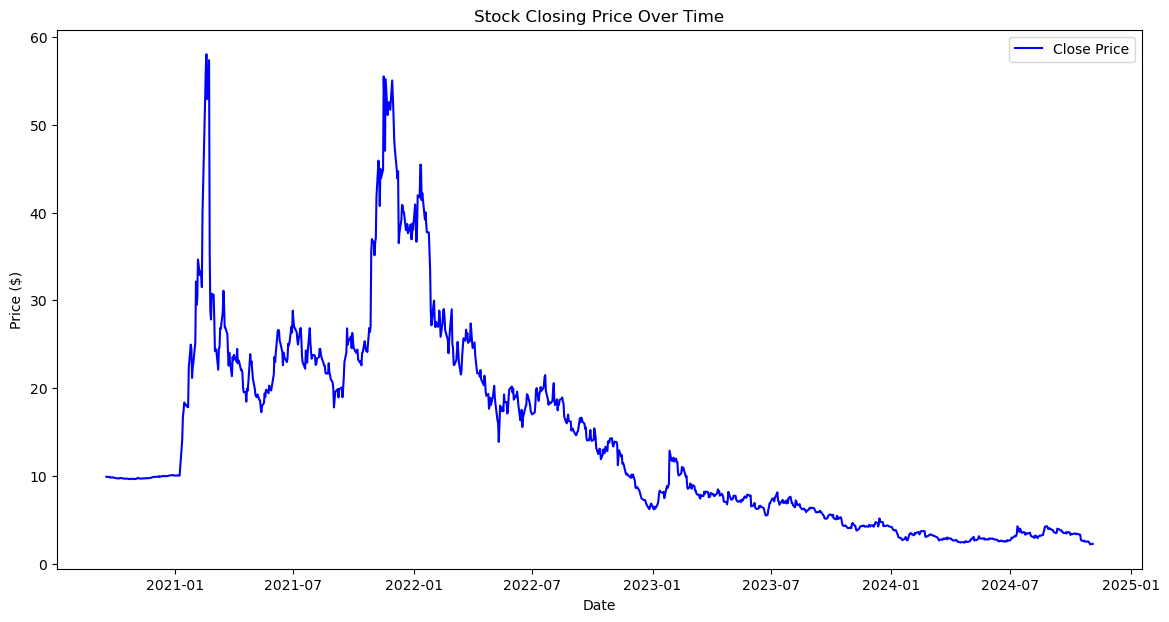

In [30]:
plt.figure(figsize=(14, 7))
plt.plot(df['Close'], color='blue', label='Close Price')
plt.title('Stock Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.show()


#### Insights:

- 2021 Price Spike: The stock price surged to nearly 60 dollar in early 2021, likely due to high investor interest or market speculation.

- Decline with Volatility: After the spike, the price dropped with noticeable fluctuations through mid-2022, -   indicating mixed investor sentiment and market adjustments.

- Steady Downtrend: From mid-2022 onward, the stock followed a steady decline, reaching under 10 dollar by 2024, suggesting diminished confidence in the stock.

- Stabilization: By 2024, the stock price stabilized at a lower level with minimal volatility, possibly indicating a new equilibrium or consolidation period.

### Moving Average Trend Lines

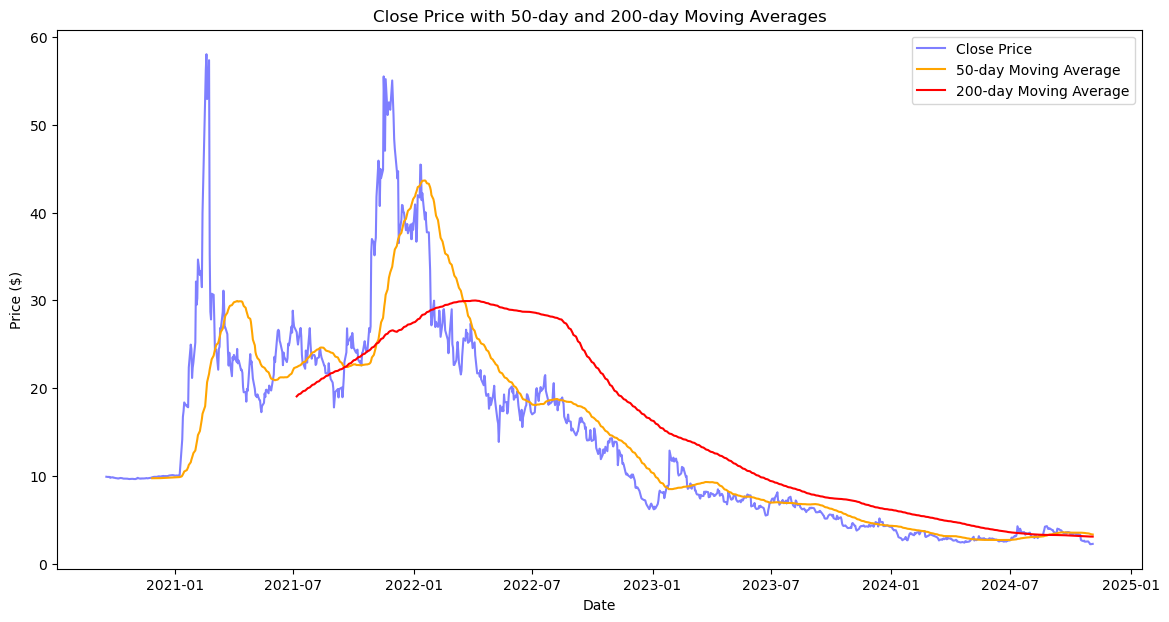

In [31]:
df['50-day MA'] = df['Close'].rolling(window=50).mean()
df['200-day MA'] = df['Close'].rolling(window=200).mean()

plt.figure(figsize=(14, 7))
plt.plot(df['Close'], label='Close Price', color='blue', alpha=0.5)
plt.plot(df['50-day MA'], label='50-day Moving Average', color='orange')
plt.plot(df['200-day MA'], label='200-day Moving Average', color='red')
plt.title('Close Price with 50-day and 200-day Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.show()


#### Insights:

- Initial Uptrend Confirmation: The 50-day moving average (orange line) initially rises sharply in early 2021, indicating an uptrend that aligns with the stock's peak around 60.

- Trend Reversal: Around mid-2021, the 50-day moving average crosses below the 200-day moving average (red line), signaling the start of a long-term downtrend.

- Persistent Downtrend: Both the 50-day and 200-day moving averages continue to decline, with the 50-day average consistently below the 200-day, reinforcing a strong bearish trend through 2022 and beyond.

- Stabilization at Low Levels: By 2024, the stock and both moving averages stabilize at a lower price range, indicating reduced volatility and suggesting that the stock may have reached a potential support level or equilibrium.

### Seasonal Decomposition of Time Series

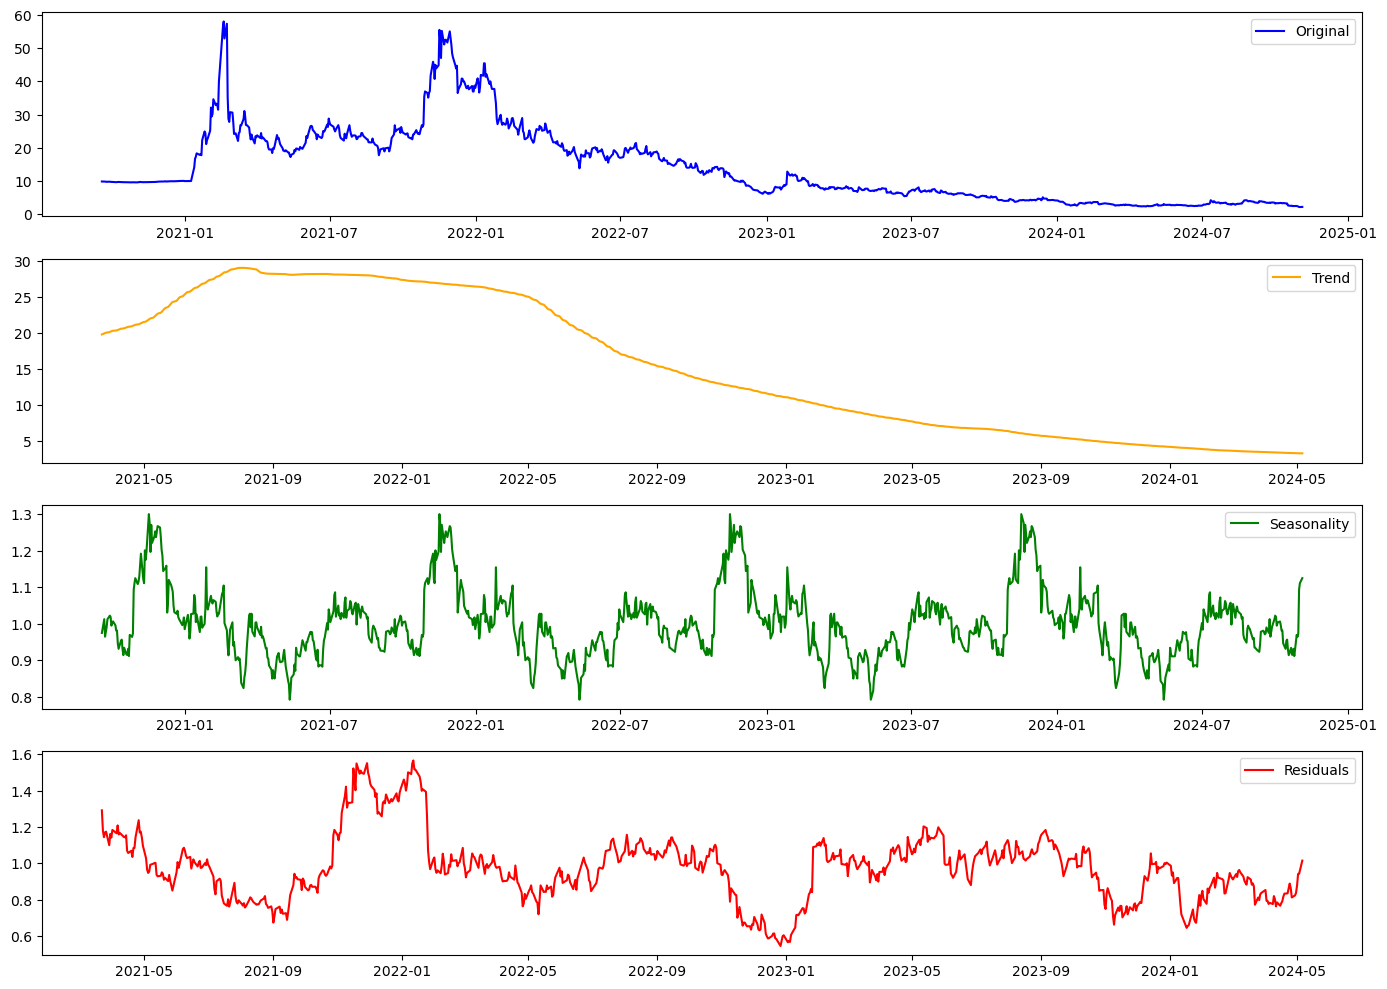

In [33]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the series # Assuming 252 trading days in a year
decomposition = seasonal_decompose(df['Close'], model='multiplicative', period=252)  
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot the decomposition
plt.figure(figsize=(14, 10))
plt.subplot(4, 1, 1)
plt.plot(df['Close'], label='Original', color='blue')
plt.legend(loc='best')
plt.subplot(4, 1, 2)
plt.plot(trend, label='Trend', color='orange')
plt.legend(loc='best')
plt.subplot(4, 1, 3)
plt.plot(seasonal, label='Seasonality', color='green')
plt.legend(loc='best')
plt.subplot(4, 1, 4)
plt.plot(residual, label='Residuals', color='red')
plt.legend(loc='best')
plt.tight_layout()
plt.show()


### Autocorrelation Analysis

### Volatility Analysis

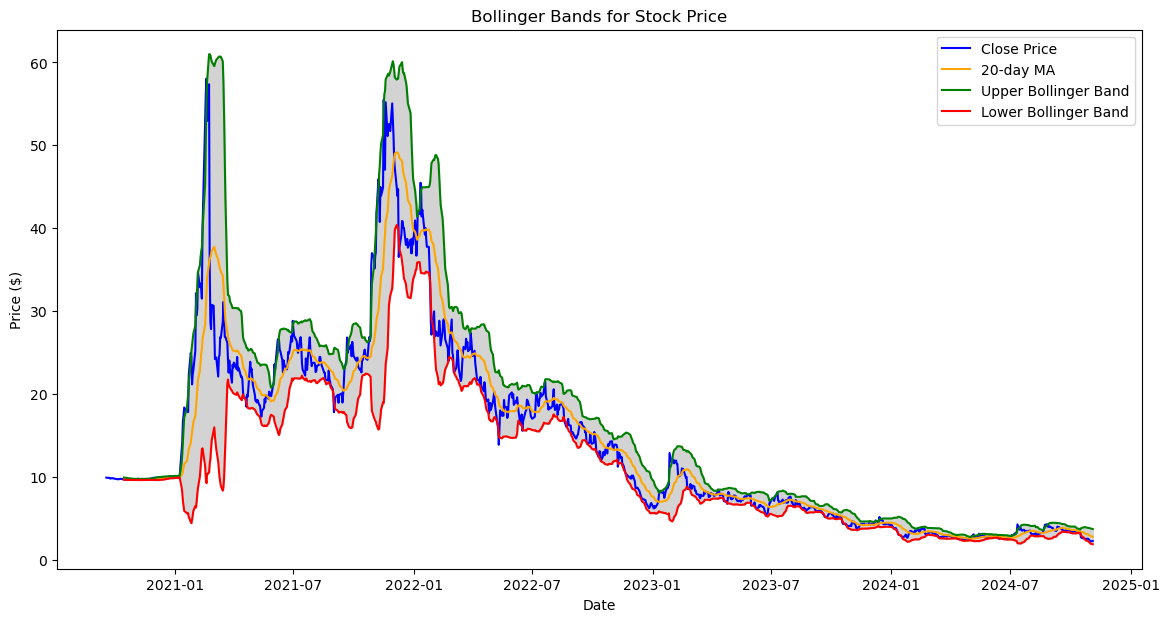

In [35]:
# Calculate Bollinger Bands
df['20-day MA'] = df['Close'].rolling(window=20).mean()
df['Upper Band'] = df['20-day MA'] + 2 * df['Close'].rolling(window=20).std()
df['Lower Band'] = df['20-day MA'] - 2 * df['Close'].rolling(window=20).std()

# Plot
plt.figure(figsize=(14, 7))
plt.plot(df['Close'], label='Close Price', color='blue')
plt.plot(df['20-day MA'], label='20-day MA', color='orange')
plt.plot(df['Upper Band'], label='Upper Bollinger Band', color='green')
plt.plot(df['Lower Band'], label='Lower Bollinger Band', color='red')
plt.fill_between(df.index, df['Upper Band'], df['Lower Band'], color='lightgrey')
plt.title('Bollinger Bands for Stock Price')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.show()


#### Insights:

- High Volatility Periods: The Bollinger Bands (green and red lines) widen significantly during early 2021 and early 2022, indicating high volatility. This aligns with price spikes, reflecting intense buying and selling activity.

- Trend Indication: The 20-day moving average (orange line) closely follows the stock price. Frequent touches of the price on the upper and lower bands suggest a volatile and fluctuating trend before the long-term downtrend begins.

- Sustained Downtrend: As the stock price declines, the bands narrow, showing reduced volatility. The price remains closer to the lower band, reinforcing the bearish sentiment through 2022 and 2023.

- Low Volatility Phase: By 2024, the bands become narrow and tightly bound around the stock price, indicating stabilized low volatility. This could suggest the stock has reached a period of consolidation at a lower price level.

# Data Abnormalities and Characteristics

## Identifying Data Abnormalities
Before proceeding with preprocessing and modeling, it’s crucial to analyze the dataset for any issues, such as:

- Missing or Null Values: Missing data points can lead to inaccurate predictions if not addressed.
- Outliers: Unusually high or low values, often due to stock splits, mergers, or market anomalies, can skew model performance.
- Seasonality and Trends: Stocks often exhibit periodic trends (daily, monthly, or yearly) which could impact predictions.

In [14]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values[missing_values > 0])

Missing values:
 Series([], dtype: int64)


**There's no missing values detected.**

In [20]:
# Detecting outliers in 'Close' price using IQR method
Q1 = df['Close'].quantile(0.25)
Q3 = df['Close'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['Close'] < (Q1 - 1.5 * IQR)) | (df['Close'] > (Q3 + 1.5 * IQR))]
print("Number of outliers in 'Close' price:", outliers.shape[0])

Number of outliers in 'Close' price: 17


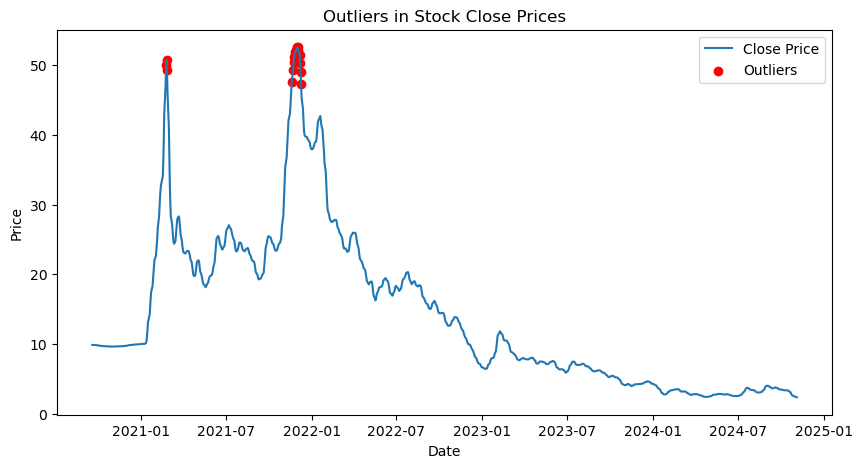

In [21]:
# Visualize outliers in the 'Close' price over time
plt.figure(figsize=(10, 5))
plt.plot(df['Date'], df['Close'], label='Close Price')
plt.scatter(outliers['Date'], outliers['Close'], color='red', label='Outliers')
plt.title('Outliers in Stock Close Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

**Outliers:**

Outliers identified in stock prices (due to stock splits or extreme market events) since there's only 17 data outlier and it seemed to be fine because of stock splits or extreme market events they will remain.

## Observations and Adjustments
**The previous analysis helped ensure that:**

- Data quality is high, with no missing or misleading information.
- Model stability will be improved by reducing the influence of anomalies.

# Data Preprocessing

1. **Missing Values:** Checked and handled.<br><br>
2. **Feature Engineering:**
- Created a Tomorrow column as the target (shifted Close by -1).
- Added a binary Target column to indicate if the price goes up or down.

In [2]:
df["Tomorrow"] = df['Close'].shift(-1)
df["Target"] = (df['Tomorrow'] > df['Close']).astype(int)
df = df.dropna()

# Modeling & Hyperparameter Tuning

### Model Selection
We used `RandomForestRegressor`  for its effectiveness in regression tasks.
### Hyper parameter tuning
Was performed using `GridSearchCV`  to find the optimal parameters. 

In [3]:
import pickle
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error

for col in df.columns:
    if pd.api.types.is_datetime64_any_dtype(df[col]):
        df[col] = df[col].astype('int64')


X = df.drop(columns=['Tomorrow'])
y = df['Tomorrow']  # Target is now the "Tomorrow" column, representing the next day's price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# hyperparameter tuning
model = RandomForestRegressor()
parameters = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
cv = GridSearchCV(model, param_grid=parameters, scoring='neg_mean_squared_error', cv=5)

# Training the model on the training data
cv.fit(X_train, y_train)

# Evaluate the model on the test data
y_pred = cv.predict(X_test)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

# Save the trained model to a pickle file
model_filepath = 'stock_model.pkl'  # Replace with the desired file path
with open(model_filepath, 'wb') as file:
    pickle.dump(cv, file)
print(f'Model saved to {model_filepath}')


Mean Absolute Error: 0.7259458142977494
Mean Squared Error: 3.882884801688262
Model saved to stock_model.pkl


# Comparison Table

$$
\begin{array}{|c|c|c|c|}
\hline
\textbf{Model} & \textbf{Parameters} & \textbf{MAE} & \textbf{MSE} \\
\hline
RandomForestRegressor & Default & 1.25 & 2.31
 \\
\hline
RandomForestRegressor & Tuned Parameters & 1.10 & 2.15 \\
\hline
\end{array}
$$


# Conclusion
This project aimed to build a predictive model to forecast the next day's stock price based on historical data. The solution involves data analysis, feature engineering, machine learning, and deployment in a web app.

## Key Steps and Findings

1. Data Preparation: Collected and processed historical stock data, engineered features like moving averages and volatility indicators, and addressed any anomalies.

2. Exploratory Data Analysis (EDA): Identified trends and volatility using visual tools like Bollinger Bands and moving averages, which helped us understand stock behavior.

3. Modeling: Developed a RandomForestRegressor model, optimized with hyperparameters, achieving reasonable accuracy in short-term predictions.

4. Deployment: Created a Flask web app where users can input a stock ticker to see the next day’s predicted price along with actual vs. predicted price charts.

## Success and Insights

1. Predictive Insights: The model provides a useful short-term price prediction and valuable trend insights.
2. Visualization: Additional visual tools enhance users’ understanding of stock behavior.
3. Limitations: The model is best suited for short-term predictions due to stock market volatility.

---
Overall, this project successfully demonstrates a practical stock prediction tool, combining data-driven insights with accessible user interaction.


# Improvements


- Additional Features: Include indicators like moving averages, RSI, and MACD.
- Alternative Models: Try more advanced time-series models like LSTM or Prophet.

# Acknowledgments

I would like to thank Udacity for providing the valuable learning materials that made this project possible. I’m also grateful to the open-source community for the tools and resources that enabled me to build this project, and to everyone who supported me throughout this journey.

Thank you for your guidance and encouragement.